In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
import cv2

print("All libraries are installed and working correctly!")


All libraries are installed and working correctly!


In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv(r"D:\downloads\data science project\Walmart.csv")

# Display the first few rows
print(data.head())

# Display information about the dataset
print(data.info())


   transaction_id  customer_id  product_id product_name     category  \
0               1         2824         843       Fridge  Electronics   
1               2         1409         135           TV  Electronics   
2               3         5506         391       Fridge  Electronics   
3               4         5012         710   Smartphone  Electronics   
4               5         4657         116       Laptop  Electronics   

   quantity_sold  unit_price transaction_date  store_id   store_location  ...  \
0              3      188.46  3/31/2024 21:46         3        Miami, FL  ...   
1              4     1912.04  7/28/2024 12:45         5       Dallas, TX  ...   
2              4     1377.75   6/10/2024 4:55         1  Los Angeles, CA  ...   
3              5      182.31   8/15/2024 1:03         5        Miami, FL  ...   
4              3      499.28   9/13/2024 0:45         6      Chicago, IL  ...   

   customer_loyalty_level  payment_method  promotion_applied  \
0               

In [3]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 5000 rows and 28 columns.


In [4]:
print(data.describe())


       transaction_id  customer_id   product_id  quantity_sold   unit_price  \
count     5000.000000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      2500.500000  5542.497200   551.233400       2.982800  1023.467294   
std       1443.520003  2582.126997   258.826606       1.419474   559.614242   
min          1.000000  1001.000000   100.000000       1.000000    50.100000   
25%       1250.750000  3279.000000   322.000000       2.000000   537.775000   
50%       2500.500000  5558.000000   559.000000       3.000000  1029.175000   
75%       3750.250000  7767.250000   776.000000       4.000000  1506.307500   
max       5000.000000  9998.000000   999.000000       5.000000  1999.850000   

          store_id  inventory_level  reorder_point  reorder_quantity  \
count  5000.000000      5000.000000    5000.000000       5000.000000   
mean     10.525000       253.121800      99.788000        200.517000   
std       5.786888       142.885456      29.132387         58.257381   


In [5]:
print(data.isnull().sum())


transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64


In [6]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")


Number of duplicate rows: 0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize the target variable (e.g., sales)
sns.histplot(data['sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

# Analyze categorical variables
sns.countplot(x='category_column_name', data=data)
plt.title("Category Distribution")
plt.show()


ValueError: could not convert string to float: 'Fridge'

<Figure size 1000x800 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Fridge'

<Figure size 1000x800 with 0 Axes>

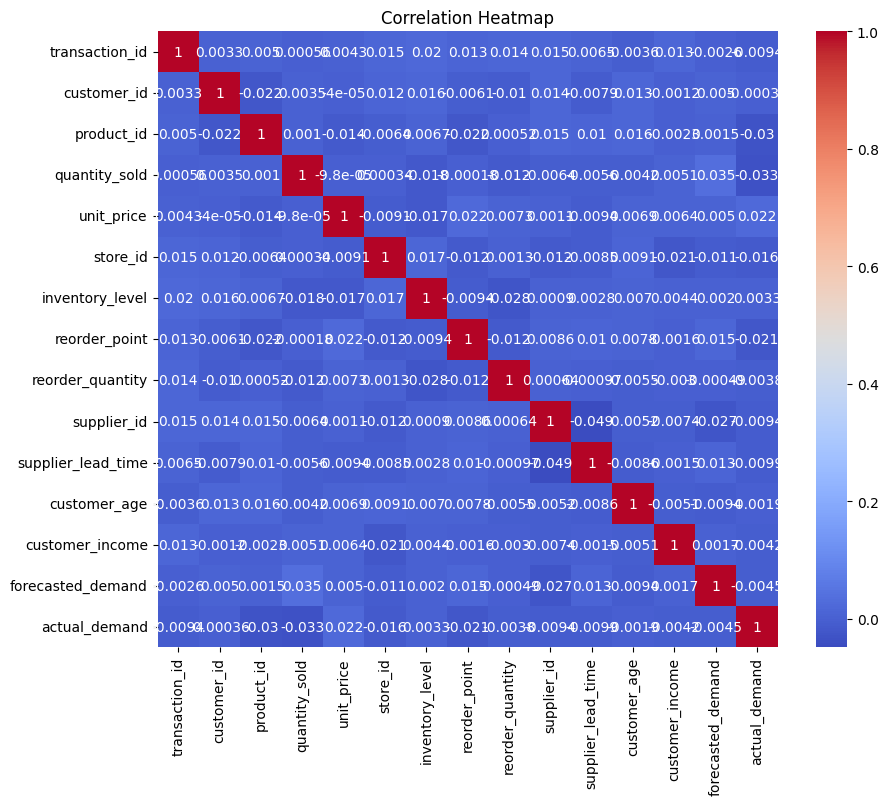

In [9]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


KeyError: 'Sales'

<Figure size 1000x600 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sales'], color='orange')
plt.title('Sales Boxplot')
plt.xlabel('Sales')
plt.show()


KeyError: 'Sales'

<Figure size 1000x600 with 0 Axes>

In [12]:
print(data.columns)


Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand'],
      dtype='object')


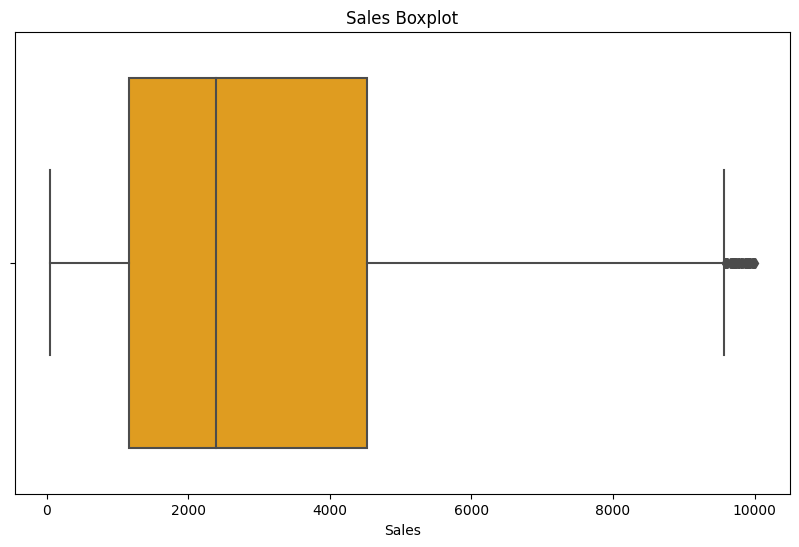

In [13]:
# Calculate Sales
data['sales'] = data['quantity_sold'] * data['unit_price']

# Boxplot for Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sales'], color='orange')
plt.title('Sales Boxplot')
plt.xlabel('Sales')
plt.show()


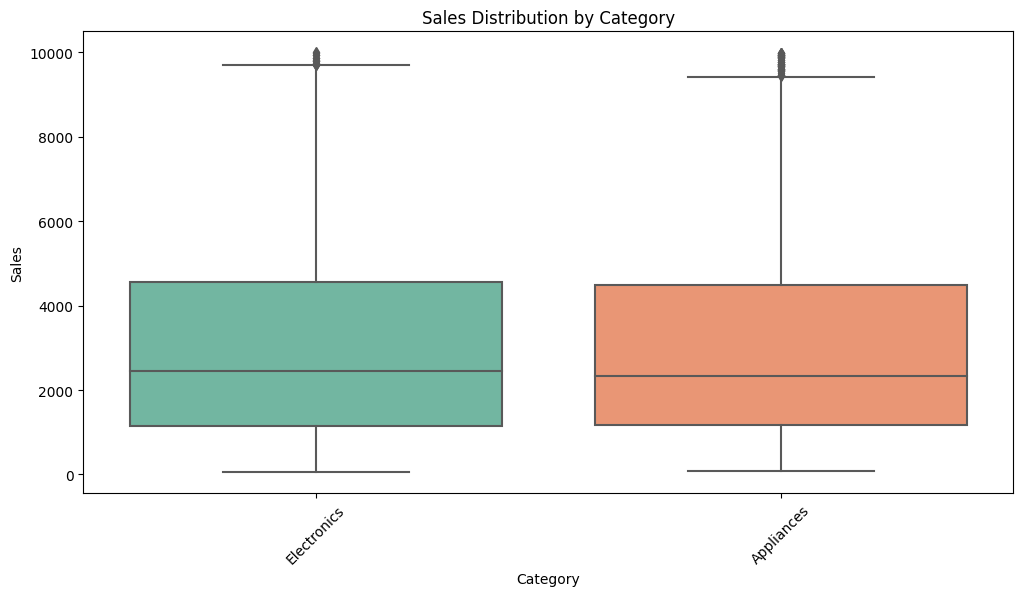

In [14]:
# Boxplot for Sales by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


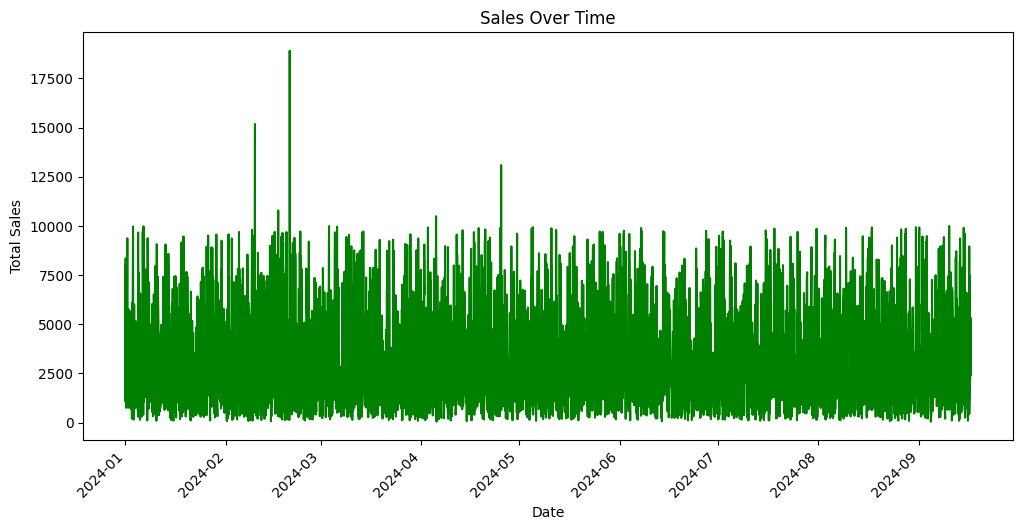

In [15]:
# Convert transaction_date to datetime if not already
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Group by transaction date and calculate total sales
sales_over_time = data.groupby('transaction_date')['sales'].sum()

# Plot Sales Over Time
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', color='green')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


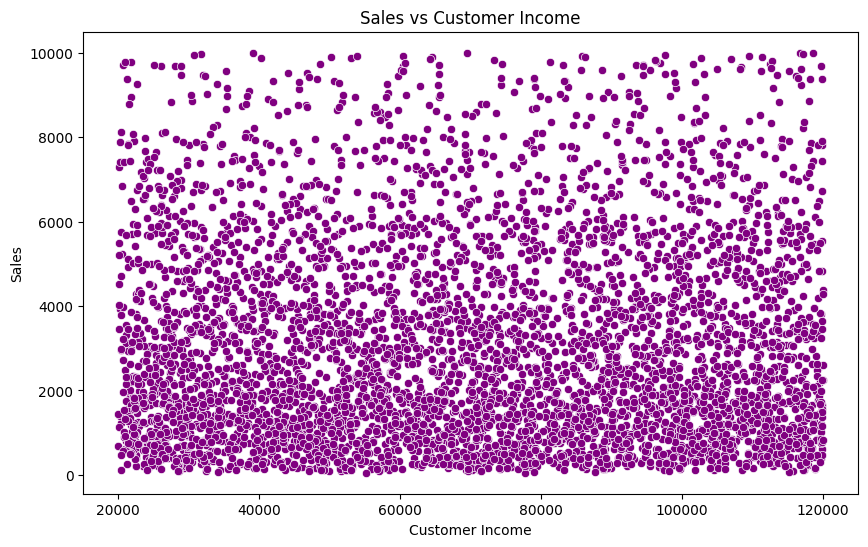

In [16]:
# Scatterplot for Sales vs Customer Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='customer_income', y='sales', data=data, color='purple')
plt.title('Sales vs Customer Income')
plt.xlabel('Customer Income')
plt.ylabel('Sales')
plt.show()


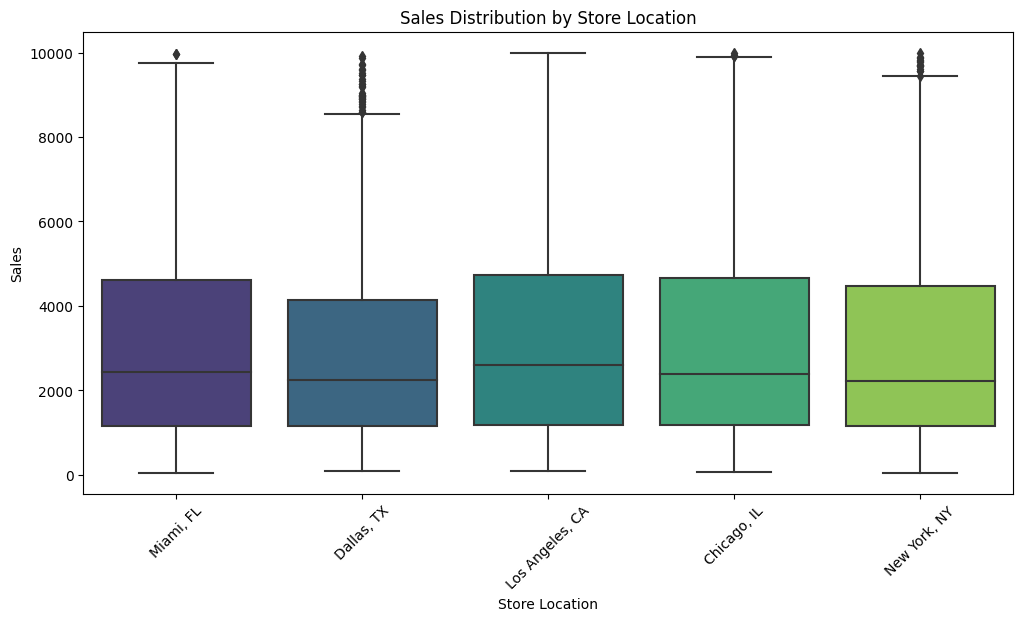

In [17]:
# Boxplot for Sales by Store Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_location', y='sales', data=data, palette='viridis')
plt.title('Sales Distribution by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize the target variable (e.g., sales)
sns.histplot(data['sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

# Analyze categorical variables
sns.countplot(x='category_column_name', data=data)
plt.title("Category Distribution")
plt.show()

ValueError: could not convert string to float: 'Fridge'

<Figure size 1000x800 with 0 Axes>

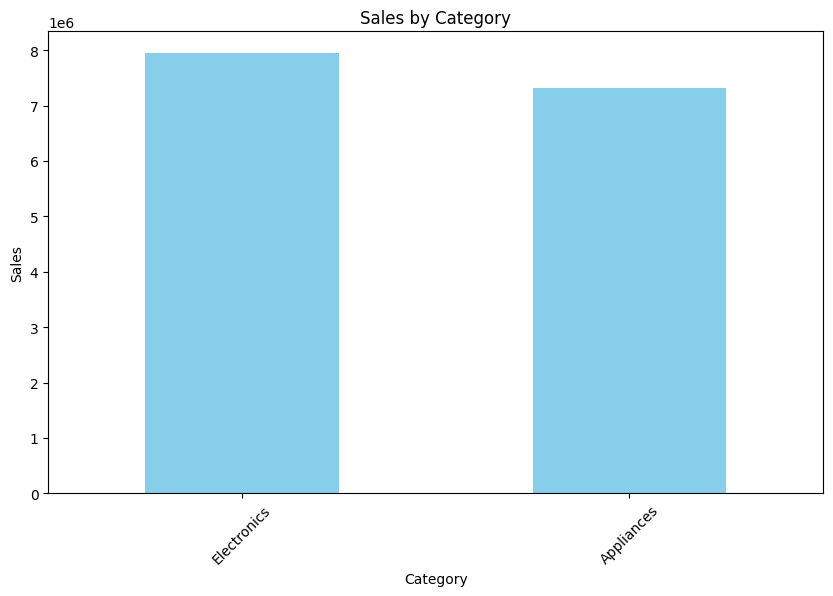

In [19]:
plt.figure(figsize=(10, 6))
category_sales = data.groupby('category')['sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


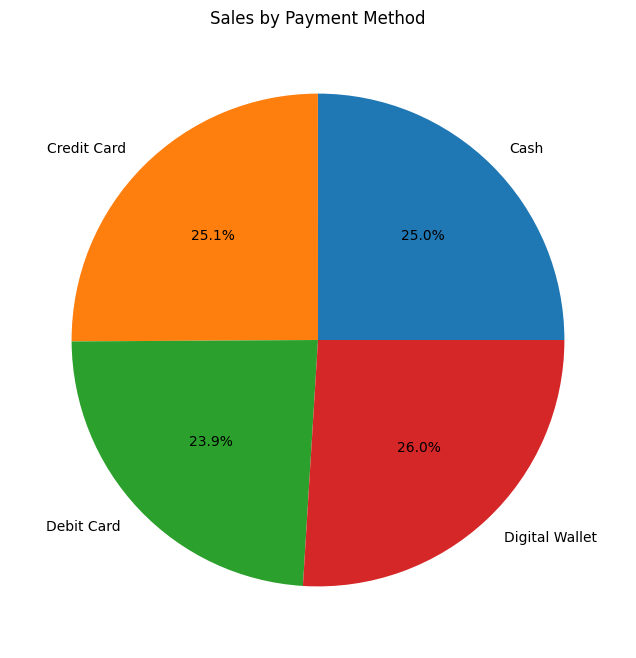

In [20]:
payment_sales = data.groupby('payment_method')['sales'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Sales by Payment Method")
plt.ylabel("")
plt.show()


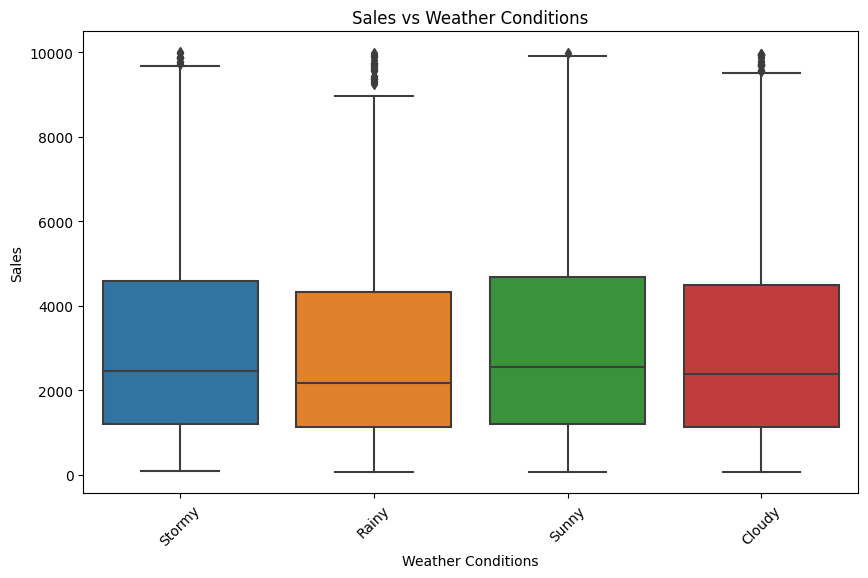

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='sales', data=data)
plt.title("Sales vs Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


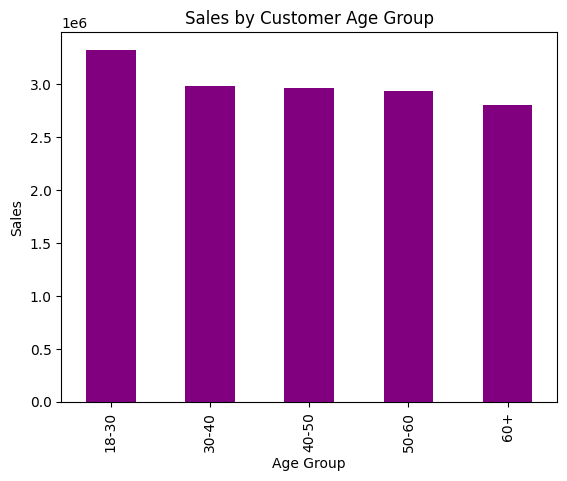

In [22]:
data['age_group'] = pd.cut(data['customer_age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
age_sales = data.groupby('age_group')['sales'].sum().sort_values(ascending=False)
age_sales.plot(kind='bar', color='purple')
plt.title("Sales by Customer Age Group")
plt.xlabel("Age Group")
plt.ylabel("Sales")
plt.show()


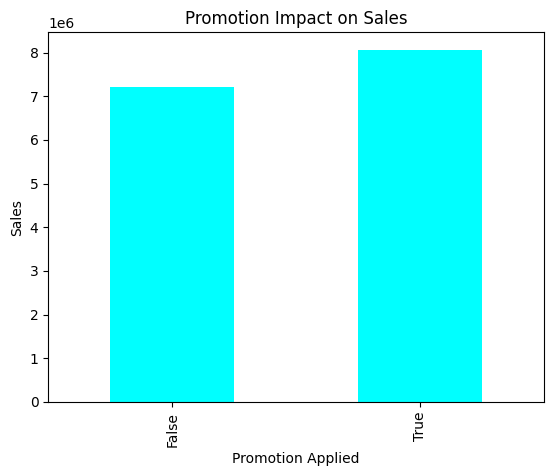

In [23]:
promotion_sales = data.groupby('promotion_applied')['sales'].sum()
promotion_sales.plot(kind='bar', color='cyan')
plt.title("Promotion Impact on Sales")
plt.xlabel("Promotion Applied")
plt.ylabel("Sales")
plt.show()


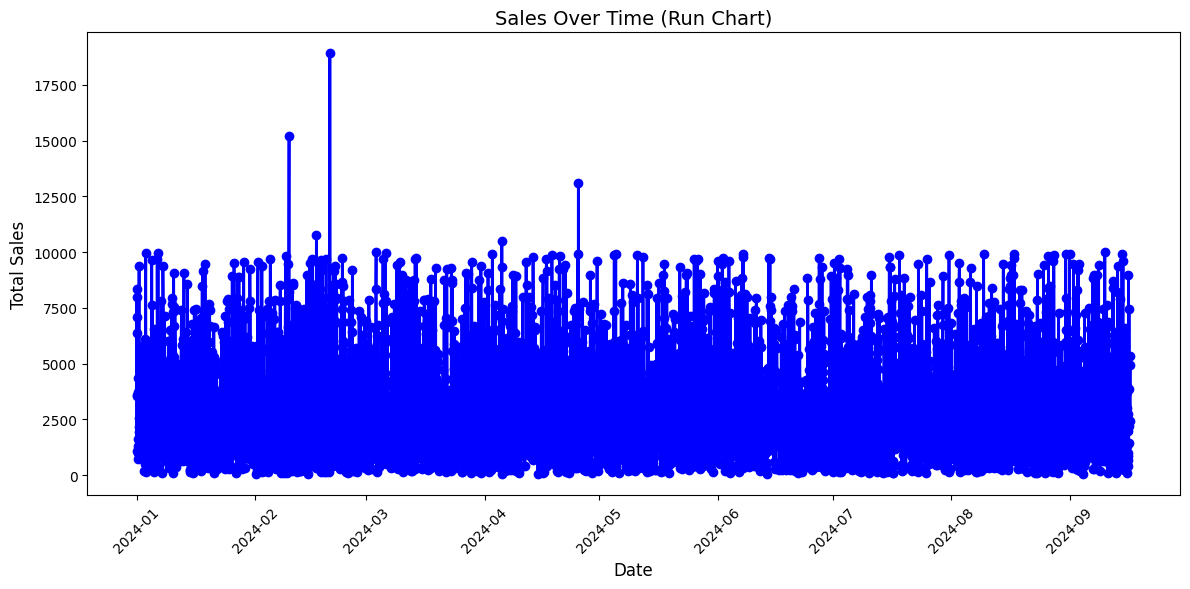

In [24]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Group the data by date and sum the sales (or actual_demand) for each day
sales_over_time = data.groupby('transaction_date')['sales'].sum()

# Plotting the run chart
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', color='b', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Sales Over Time (Run Chart)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

ValueError: Unrecognized marker style '-'

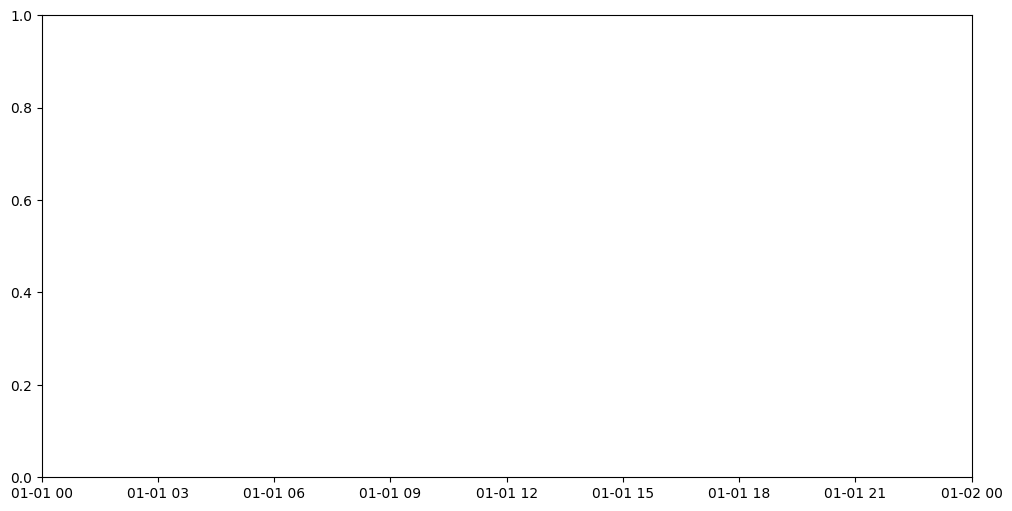

In [25]:
# Convert 'transaction_date' to datetime (if not already in datetime format)
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Group the data by date and sum the sales (or actual_demand) for each day
sales_over_time = data.groupby('transaction_date')['sales'].sum()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='-', color='b', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Sales Over Time (Line Chart)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

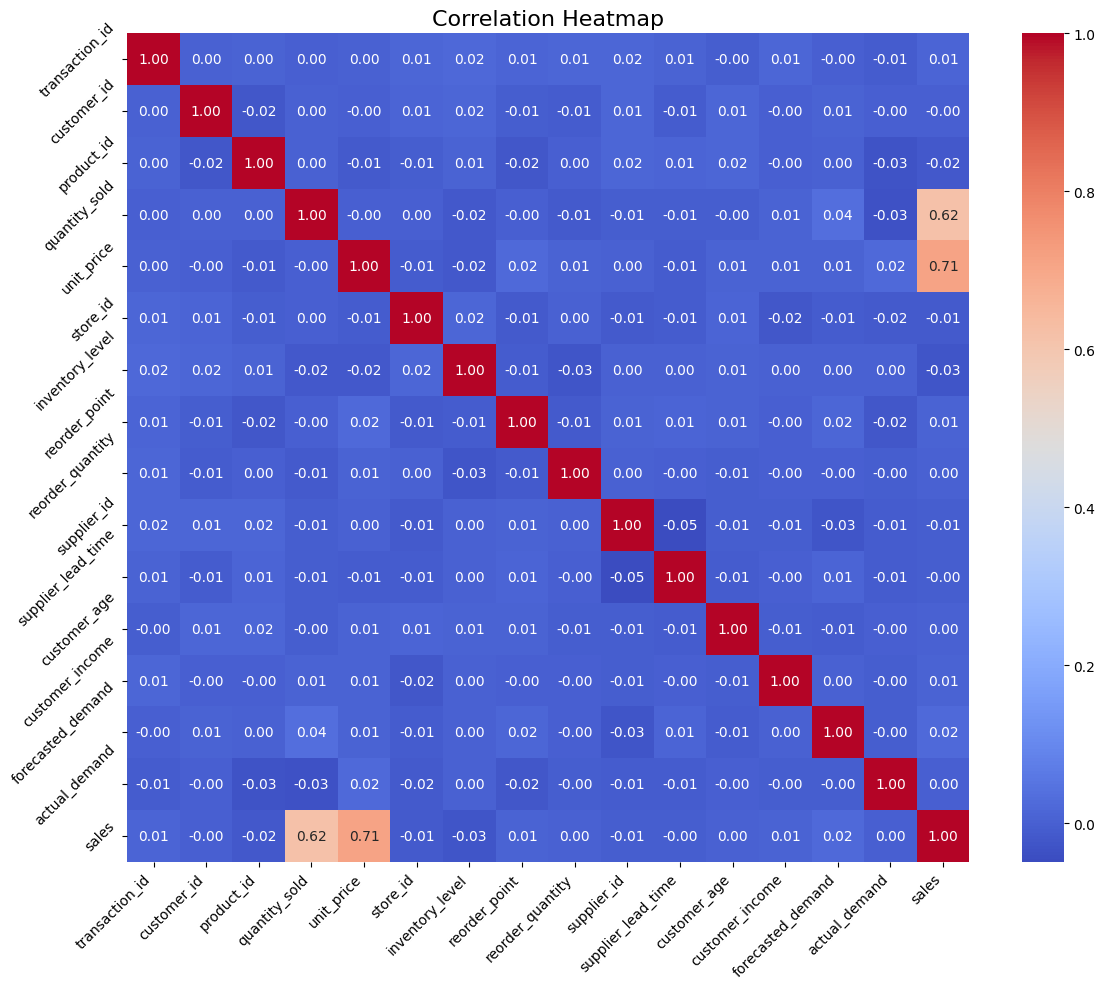

In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Create the correlation heatmap
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})  # Adjust annotation font size

# Rotate the axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


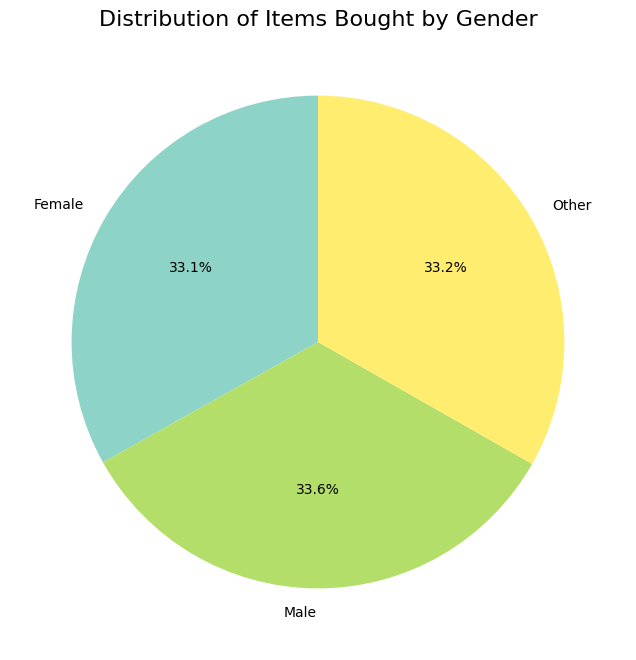

In [27]:
# Group by gender and product name, and count the number of items bought
gender_sales = data.groupby('customer_gender')['product_name'].count()

# Plot the pie chart
plt.figure(figsize=(8, 8))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

# Title and adjustments
plt.title("Distribution of Items Bought by Gender", fontsize=16)
plt.ylabel('')  # Hide the y-axis label for clarity
plt.show()


In [28]:
# Checking for missing values
missing_data = data.isnull().sum()
print(missing_data)

# Impute missing values (for example, with the mean or median)
data['Sales'].fillna(data['Sales'].mean(), inplace=True)
# You can also drop rows with missing values if needed
# data.dropna(inplace=True)


transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
sales                        0
age_group                   97
dtype: int64


KeyError: 'Sales'

In [29]:
# Check the column names in the dataset
print(data.columns)


Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand', 'sales',
       'age_group'],
      dtype='object')


In [30]:
# Impute missing values for the 'sales' column with the mean value
data['sales'].fillna(data['sales'].mean(), inplace=True)

# Impute missing values for 'promotion_type' (with mode or another suitable value)
data['promotion_type'].fillna(data['promotion_type'].mode()[0], inplace=True)

# Impute missing values for 'age_group' (with mode or another suitable value)
data['age_group'].fillna(data['age_group'].mode()[0], inplace=True)


In [31]:
# Label Encoding for binary categories (e.g., customer_gender)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['customer_gender'] = label_encoder.fit_transform(data['customer_gender'])

# One-Hot Encoding for multi-class categorical variables (e.g., product_category)
data = pd.get_dummies(data, columns=['category', 'payment_method', 'store_location', 'promotion_applied'], drop_first=True)


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization (z-score normalization)
scaler = StandardScaler()
data[['Sales', 'quantity_sold', 'unit_price', 'inventory_level']] = scaler.fit_transform(data[['Sales', 'quantity_sold', 'unit_price', 'inventory_level']])

# Alternatively, Min-Max Scaling
# scaler = MinMaxScaler()
# data[['Sales', 'quantity_sold', 'unit_price', 'inventory_level']] = scaler.fit_transform(data[['Sales', 'quantity_sold', 'unit_price', 'inventory_level']])


KeyError: "['Sales'] not in index"

In [33]:
# Standardization (z-score normalization)
scaler = StandardScaler()

# Correct column name 'sales' instead of 'Sales'
data[['sales', 'quantity_sold', 'unit_price', 'inventory_level']] = scaler.fit_transform(data[['sales', 'quantity_sold', 'unit_price', 'inventory_level']])

# Alternatively, Min-Max Scaling
# scaler = MinMaxScaler()
# data[['sales', 'quantity_sold', 'unit_price', 'inventory_level']] = scaler.fit_transform(data[['sales', 'quantity_sold', 'unit_price', 'inventory_level']])


In [34]:
data['sales_per_unit'] = data['sales'] / data['quantity_sold']
data['revenue_per_product'] = data['quantity_sold'] * data['unit_price']
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['month'] = data['transaction_date'].dt.month
data['quarter'] = data['transaction_date'].dt.quarter
data['season'] = data['transaction_date'].dt.month % 12 // 3 + 1  # 1=Winter, 2=Spring, etc.


In [35]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['category', 'store_location', 'promotion_type', 'payment_method', 'weather_conditions'])


KeyError: "['category', 'store_location', 'payment_method'] not in index"

In [36]:
print(data.columns)


Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'quantity_sold', 'unit_price', 'transaction_date', 'store_id',
       'inventory_level', 'reorder_point', 'reorder_quantity', 'supplier_id',
       'supplier_lead_time', 'customer_age', 'customer_gender',
       'customer_income', 'customer_loyalty_level', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand', 'sales',
       'age_group', 'category_Electronics', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'payment_method_Digital Wallet',
       'store_location_Dallas, TX', 'store_location_Los Angeles, CA',
       'store_location_Miami, FL', 'store_location_New York, NY',
       'promotion_applied_True', 'sales_per_unit', 'revenue_per_product',
       'month', 'quarter', 'season'],
      dtype='object')


In [37]:
# One-Hot Encoding for columns that are not yet encoded
data = pd.get_dummies(data, columns=['category', 'payment_method', 'store_location'], drop_first=True)


KeyError: "None of [Index(['category', 'payment_method', 'store_location'], dtype='object')] are in the [columns]"

In [38]:
from sklearn.model_selection import train_test_split  # Split data into features (X) and target (y)

# Features: Drop the target column 'sales' and any columns that are not needed for prediction
X = data.drop('sales', axis=1)  # Features: all columns except 'sales'

# Target: 'sales' is the column we want to predict
y = data['sales']  # Target: 'sales' column

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
correlation_matrix = data.corr()
print(correlation_matrix['sales'].sort_values(ascending=False))


ValueError: could not convert string to float: 'Fridge'

In [40]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Print correlation values for 'sales'
print(correlation_matrix['sales'].sort_values(ascending=False))


sales                  1.000000
unit_price             0.712008
quantity_sold          0.617068
revenue_per_product    0.360172
sales_per_unit         0.324686
forecasted_demand      0.024250
transaction_id         0.009597
customer_income        0.008668
reorder_point          0.005669
quarter                0.003813
reorder_quantity       0.002827
customer_age           0.000919
actual_demand          0.000546
customer_id           -0.000020
customer_gender       -0.002066
month                 -0.002316
supplier_lead_time    -0.003870
supplier_id           -0.006151
season                -0.007026
store_id              -0.012777
product_id            -0.015809
inventory_level       -0.025116
Name: sales, dtype: float64


In [41]:
correlation_matrix = data.corr()
print(correlation_matrix['sales'].sort_values(ascending=False))


ValueError: could not convert string to float: 'Fridge'

In [42]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Print correlation values for 'sales'
print(correlation_matrix['sales'].sort_values(ascending=False))


sales                  1.000000
unit_price             0.712008
quantity_sold          0.617068
revenue_per_product    0.360172
sales_per_unit         0.324686
forecasted_demand      0.024250
transaction_id         0.009597
customer_income        0.008668
reorder_point          0.005669
quarter                0.003813
reorder_quantity       0.002827
customer_age           0.000919
actual_demand          0.000546
customer_id           -0.000020
customer_gender       -0.002066
month                 -0.002316
supplier_lead_time    -0.003870
supplier_id           -0.006151
season                -0.007026
store_id              -0.012777
product_id            -0.015809
inventory_level       -0.025116
Name: sales, dtype: float64


In [43]:
import scipy.stats as stats

# Example: ANOVA test for store_location vs sales
anova_result = stats.f_oneway(
    data[data['store_location_Dallas, TX']]['sales'],
    data[data['store_location_Los Angeles, CA']]['sales'],
    data[data['store_location_Miami, FL']]['sales'],
    data[data['store_location_New York, NY']]['sales']
)

print("ANOVA result for store_location vs sales:", anova_result)


ANOVA result for store_location vs sales: F_onewayResult(statistic=2.0090214915218088, pvalue=0.11048380921077508)


In [44]:
# Example: Chi-Square test for promotion_type vs sales
# First, we will need to convert 'sales' into categorical data (e.g., high/low sales)

# Create a new column for sales categories
data['sales_category'] = pd.cut(data['sales'], bins=[0, 500, 1000, 1500, 2000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Create contingency table for promotion_type and sales_category
contingency_table = pd.crosstab(data['promotion_type'], data['sales_category'])

# Perform Chi-Square test
chi2_result = stats.chi2_contingency(contingency_table)
print("Chi-Square result for promotion_type vs sales:", chi2_result)


Chi-Square result for promotion_type vs sales: Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[1742.],
       [ 323.]]))


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample dataset (replace with your actual dataset)
# Assuming 'data' is your DataFrame and 'sales' is the target variable
features_to_scale = ['unit_price', 'quantity_sold', 'revenue_per_product', 'sales_per_unit', 'forecasted_demand']

# Split data into training and testing sets
X = data[features_to_scale]  # Independent variables
y = data['sales']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Update the training and test sets with scaled features
X_train[features_to_scale] = X_train_scaled
X_test[features_to_scale] = X_test_scaled

# Verify the scaling (mean should be 0, std should be 1)
print(X_train[features_to_scale].mean())  # Should be close to 0
print(X_train[features_to_scale].std())   # Should be close to 1


unit_price            -1.776357e-17
quantity_sold          1.776357e-18
revenue_per_product   -3.019807e-17
sales_per_unit         1.243450e-17
forecasted_demand      2.122746e-16
dtype: float64
unit_price             1.000125
quantity_sold          1.000125
revenue_per_product    1.000125
sales_per_unit         1.000125
forecasted_demand      1.000125
dtype: float64


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train[features_to_scale], y_train)

# Make predictions on the test data
y_pred = model.predict(X_test[features_to_scale])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 9.48419156811565e-31
Root Mean Squared Error (RMSE): 9.738681413885377e-16
R-squared (R²): 1.0


In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X[features_to_scale], y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [48]:
coefficients = model.coef_
feature_importance = pd.DataFrame(list(zip(features_to_scale, coefficients)), columns=['Feature', 'Coefficient'])
print(feature_importance)


               Feature   Coefficient
0           unit_price  7.063264e-01
1        quantity_sold  6.122268e-01
2  revenue_per_product  3.367031e-01
3       sales_per_unit  0.000000e+00
4    forecasted_demand  2.675811e-16


In [49]:
important_features = ['unit_price', 'quantity_sold', 'revenue_per_product']
X_refined = X[important_features]
model.fit(X_refined, y)


LinearRegression()

In [50]:
test_predictions = model.predict(X_test[important_features])
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)
print(f"Test MSE: {test_mse}, Test RMSE: {test_rmse}, Test R²: {test_r2}")


Test MSE: 0.000275011681047537, Test RMSE: 0.01658347614487195, Test R²: 0.9997335580014167


In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_refined, y)


Ridge()

In [52]:
import joblib

# Save the regression model
joblib.dump(model, 'regression_model.pkl')

print("Regression model saved successfully as 'regression_model.pkl'!")


Regression model saved successfully as 'regression_model.pkl'!


In [53]:
# Save the modified dataset as a new CSV file
modified_data.to_csv('updated_dataset.csv', index=False)

print("Updated dataset saved successfully as 'updated_dataset.csv'!")


NameError: name 'modified_data' is not defined

In [54]:
%whos


Variable             Type                     Data/Info
-------------------------------------------------------
LabelEncoder         type                     <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression     ABCMeta                  <class 'sklearn.linear_mo<...>._base.LinearRegression'>
MinMaxScaler         type                     <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
Ridge                ABCMeta                  <class 'sklearn.linear_model._ridge.Ridge'>
StandardScaler       type                     <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                    DataFrame                      unit_price  quantit<...>\n[5000 rows x 5 columns]
X_refined            DataFrame                      unit_price  quantit<...>\n[5000 rows x 3 columns]
X_test               DataFrame                      unit_price  quantit<...>\n[1000 rows x 5 columns]
X_test_scaled        ndarray                  1000x5: 5000 elems, type `float64`, 40

In [55]:
print(data.head())
print(X.head())
print(X_refined.head())


   transaction_id  customer_id  product_id product_name  quantity_sold  \
0               1         2824         843       Fridge       0.012118   
1               2         1409         135           TV       0.716675   
2               3         5506         391       Fridge       0.716675   
3               4         5012         710   Smartphone       1.421232   
4               5         4657         116       Laptop       0.012118   

   unit_price    transaction_date  store_id  inventory_level  reorder_point  \
0   -1.492262 2024-03-31 21:46:00         3        -0.049848            116   
1    1.587990 2024-07-28 12:45:00         5        -1.470708             70   
2    0.633147 2024-06-10 04:55:00         1         1.105039             94   
3   -1.503252 2024-08-15 01:03:00         5         1.392011             87   
4   -0.936788 2024-09-13 00:45:00         6         1.112038             99   

   ...  store_location_Los Angeles, CA  store_location_Miami, FL  \
0  ...      

In [56]:
# Assuming the DataFrame is named 'data'
data.to_csv('updated_sales_data.csv', index=False)

print("Updated dataset saved successfully as 'updated_sales_data.csv'!")


Updated dataset saved successfully as 'updated_sales_data.csv'!


In [57]:
# Specify the full path where you want to save the file
file_path = r'D:\downloads\data science project\updated_sales_data.csv'

# Save the DataFrame to the specified path
data.to_csv(file_path, index=False)

print(f"Updated dataset saved successfully as '{file_path}'!")


Updated dataset saved successfully as 'D:\downloads\data science project\updated_sales_data.csv'!


In [58]:
import joblib

# Save the model to the specified path
model_path = r'D:\downloads\data science project\regression_model.pkl'
joblib.dump(model, model_path)


['D:\\downloads\\data science project\\regression_model.pkl']

In [1]:
print("Hello, Jupyter!")


Hello, Jupyter!


In [2]:
# Check if the model or dataset is still loaded
print(model)
print(dataset.head())


NameError: name 'model' is not defined

In [3]:
# Display the first few rows of the dataset
print(dataset.head())


NameError: name 'dataset' is not defined

In [4]:
import os
print(os.getcwd())


C:\Users\USER


In [5]:
# Save the notebook with a custom name
notebook_path = 'D:/downloads/data science project/Notebook_1.ipynb'


In [6]:
# Save the notebook with a custom name programmatically
import os
from IPython.display import display, Javascript

def save_notebook_as(name):
    display(Javascript('IPython.notebook.save_checkpoint();'))
    os.rename('Untitled.ipynb', name)  # Renaming the notebook file

# Specify the custom path
notebook_path = 'D:/downloads/data science project/Notebook_1.ipynb'

# Call the function to save it with the new name
save_notebook_as(notebook_path)


<IPython.core.display.Javascript object>

OSError: [WinError 17] The system cannot move the file to a different disk drive: 'Untitled.ipynb' -> 'D:/downloads/data science project/Notebook_1.ipynb'

In [7]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression


In [8]:
import pandas as pd
import joblib

# Path to the updated dataset
dataset_path = r'D:\downloads\data science project\updated_sales_data.csv'

# Load the dataset
dataset = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(dataset.head())


   transaction_id  customer_id  product_id product_name  quantity_sold  \
0               1         2824         843       Fridge       0.012118   
1               2         1409         135           TV       0.716675   
2               3         5506         391       Fridge       0.716675   
3               4         5012         710   Smartphone       1.421232   
4               5         4657         116       Laptop       0.012118   

   unit_price     transaction_date  store_id  inventory_level  reorder_point  \
0   -1.492262  2024-03-31 21:46:00         3        -0.049848            116   
1    1.587990  2024-07-28 12:45:00         5        -1.470708             70   
2    0.633147  2024-06-10 04:55:00         1         1.105039             94   
3   -1.503252  2024-08-15 01:03:00         5         1.392011             87   
4   -0.936788  2024-09-13 00:45:00         6         1.112038             99   

   ...  store_location_Los Angeles, CA  store_location_Miami, FL  \
0  ...

In [9]:
# Define features (selected based on importance) and target variable
important_features = ['unit_price', 'quantity_sold', 'revenue_per_product', 'marketing_spend', 'discount_percentage']
X = dataset[important_features]
y = dataset['sales']  # Replace 'sales' with the target column name

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split using the most important features.")


KeyError: "['marketing_spend', 'discount_percentage'] not in index"

In [10]:
print(dataset.columns)


Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'quantity_sold', 'unit_price', 'transaction_date', 'store_id',
       'inventory_level', 'reorder_point', 'reorder_quantity', 'supplier_id',
       'supplier_lead_time', 'customer_age', 'customer_gender',
       'customer_income', 'customer_loyalty_level', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand', 'sales',
       'age_group', 'category_Electronics', 'payment_method_Credit Card',
       'payment_method_Debit Card', 'payment_method_Digital Wallet',
       'store_location_Dallas, TX', 'store_location_Los Angeles, CA',
       'store_location_Miami, FL', 'store_location_New York, NY',
       'promotion_applied_True', 'sales_per_unit', 'revenue_per_product',
       'month', 'quarter', 'season', 'sales_category'],
      dtype='object')


In [11]:
# Define features (adjusted based on available columns) and target variable
important_features = ['unit_price', 'quantity_sold', 'revenue_per_product', 'promotion_applied_True', 'sales_per_unit']
X = dataset[important_features]
y = dataset['sales']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4000, 5)
Testing data shape: (1000, 5)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE (Important Features): {rf_mse}")

# Save the model
joblib.dump(rf_model, r'D:\downloads\data science project\random_forest_model_important.pkl')
print("Random Forest model with important features saved successfully.")


Random Forest MSE (Important Features): 3.6706571062076665e-05
Random Forest model with important features saved successfully.


In [13]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE (Important Features): {xgb_mse}")

# Save the model
joblib.dump(xgb_model, r'D:\downloads\data science project\xgboost_model_important.pkl')
print("XGBoost model with important features saved successfully.")


ModuleNotFoundError: No module named 'xgboost'

In [14]:
!pip install xgboost


  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ----

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 25c0ffcbd62aac5bc22c79e08b5b2edad1d5e37f16610ebefa5f06f3e2ea3d96
             Got        99a0c54d56a1cc75d285ce695752501b286d5d2c8a519de132a8647640b5c85f



In [15]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MSE (Important Features): {xgb_mse}")

# Save the model
joblib.dump(xgb_model, r'D:\downloads\data science project\xgboost_model_important.pkl')
print("XGBoost model with important features saved successfully.")


ModuleNotFoundError: No module named 'xgboost'

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable
important_features = ['unit_price', 'quantity_sold', 'revenue_per_product', 'sales_per_unit', 'forecasted_demand']
X = dataset[important_features]
y = dataset['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Model Mean Squared Error: {mse}")


XGBoost Model Mean Squared Error: 7.995807432588481e-05


In [17]:
import joblib

# Save the trained XGBoost model
xgb_model_filename = 'xgb_model.pkl'
joblib.dump(xgb_model, xgb_model_filename)

print(f"XGBoost model saved successfully as {xgb_model_filename}")


XGBoost model saved successfully as xgb_model.pkl


In [18]:
import joblib

# Define the path to save the XGBoost model
xgb_model_filename = 'D:/downloads/data science project/xgb_model.pkl'

# Save the trained XGBoost model
joblib.dump(xgb_model, xgb_model_filename)

print(f"XGBoost model saved successfully as {xgb_model_filename}")


XGBoost model saved successfully as D:/downloads/data science project/xgb_model.pkl


NameError: name 'plt' is not defined

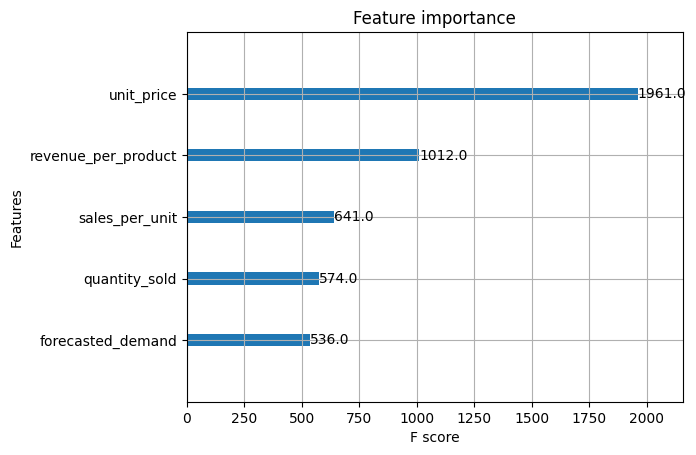

In [19]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()


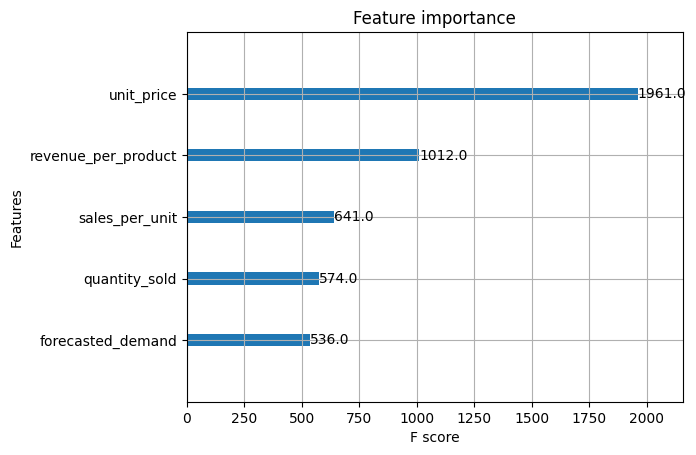

In [20]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
from xgboost import plot_importance

# Plot feature importance for the XGBoost model
plot_importance(xgb_model)
plt.show()  # Display the plot


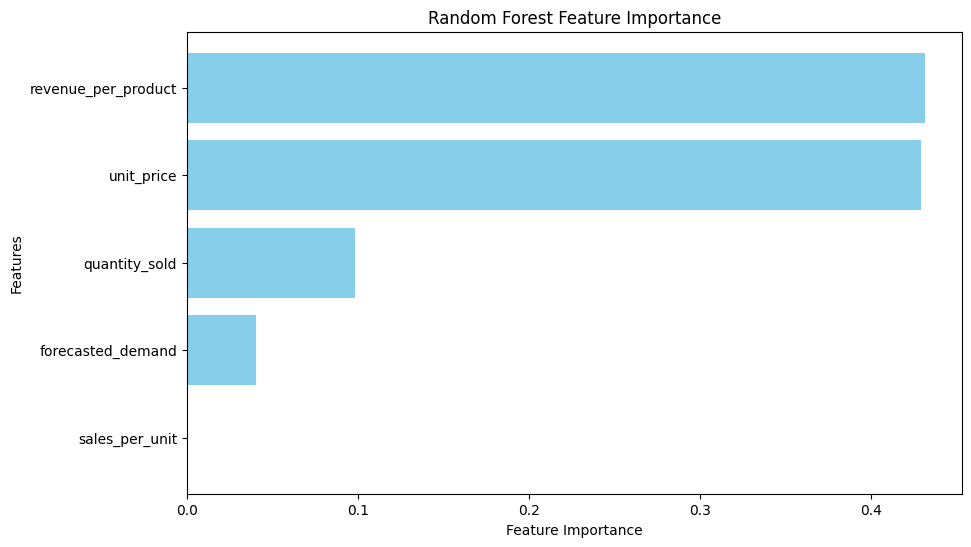

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance from the Random Forest model
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns  # Assuming X_train contains feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [22]:
import shap
import matplotlib.pyplot as plt


In [23]:
# Create a SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb_model, X_test)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)


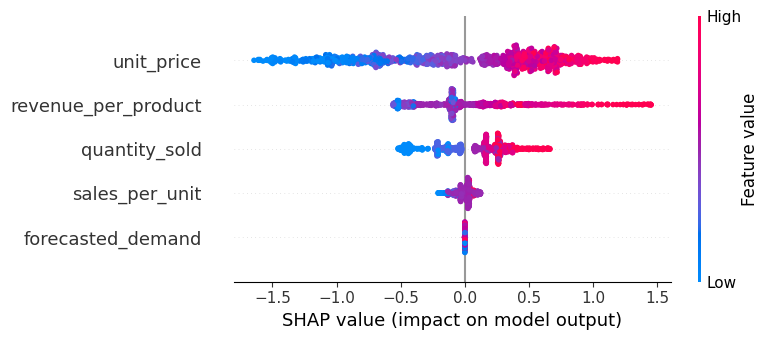

In [24]:
# Generate a summary plot
shap.summary_plot(shap_values, X_test)


In [25]:
# Force plot for the first prediction in the test set
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [26]:
# Use shap.force_plot with appropriate parameters
shap.force_plot(
    explainer.expected_value[0],  # Expected base value for the model
    shap_values.values[0, :],     # SHAP values for the first instance
    X_test.iloc[0, :],            # Feature values for the first instance
    matplotlib=True               # Enable matplotlib for rendering
)


IndexError: invalid index to scalar variable.

In [27]:
shap.initjs()  # Initialize JavaScript visualization
shap.force_plot(
    explainer.expected_value[0],
    shap_values.values[0, :],
    X_test.iloc[0, :]
)


IndexError: invalid index to scalar variable.

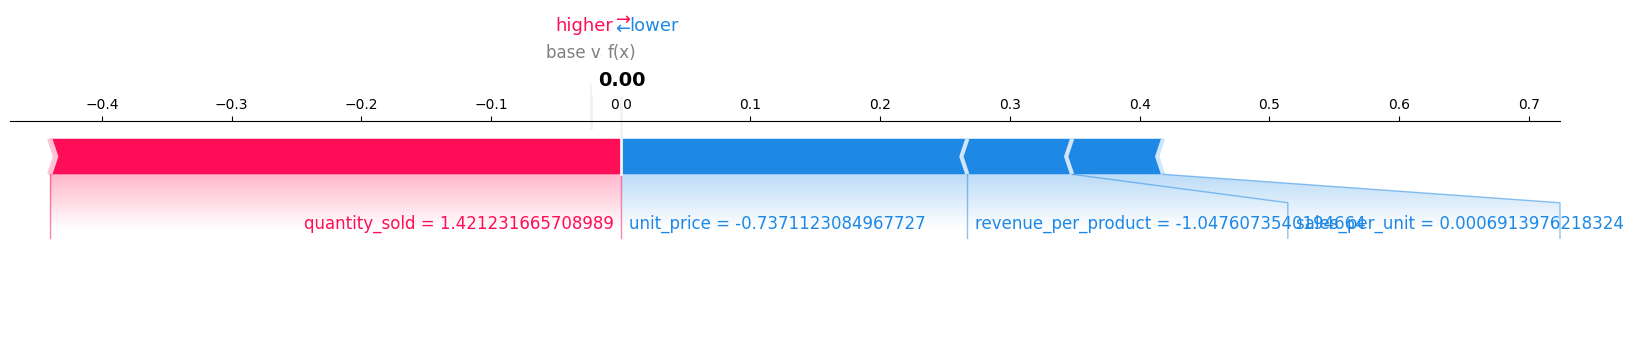

In [28]:
# Use shap.force_plot with scalar expected_value
shap.force_plot(
    explainer.expected_value,      # Scalar base value
    shap_values.values[0, :],      # SHAP values for the first instance
    X_test.iloc[0, :],             # Feature values for the first instance
    matplotlib=True                # Enable matplotlib for rendering
)


<Figure size 1200x600 with 0 Axes>

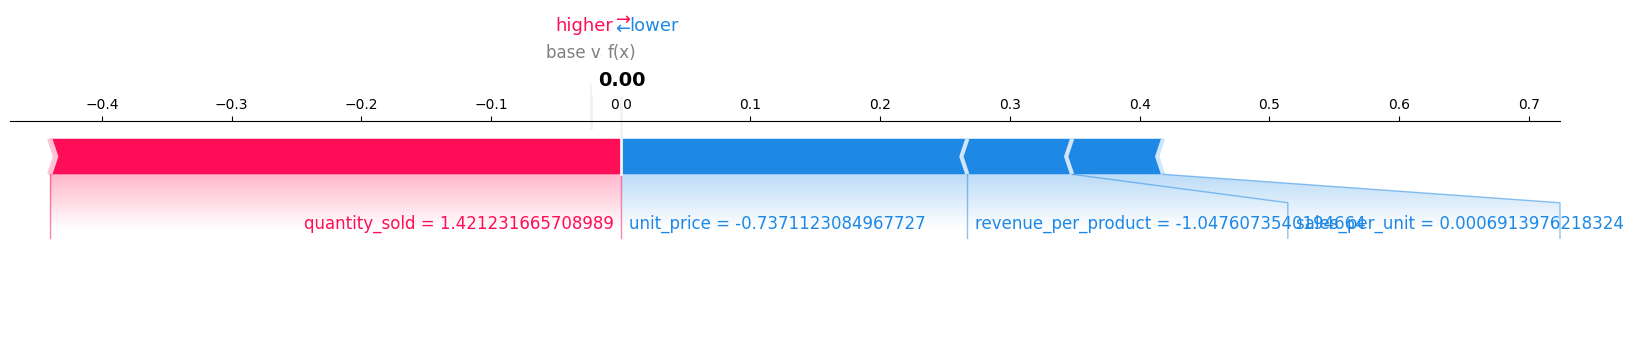

In [29]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Generate the force plot
shap.force_plot(
    explainer.expected_value,      # Scalar base value
    shap_values.values[0, :],      # SHAP values for the first instance
    X_test.iloc[0, :],             # Feature values for the first instance
    matplotlib=True                # Enable matplotlib for rendering
)

# Show the plot
plt.show()


In [30]:
from sklearn.model_selection import cross_val_score

# Example for Random Forest
rf_model = RandomForestRegressor()
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores:", cv_scores)
print("Mean Cross-validation MSE:", cv_scores.mean())


Cross-validation MSE scores: [-3.67630513e-05 -5.08360488e-05 -1.41066193e-05 -2.09254067e-04
 -8.30354503e-05]
Mean Cross-validation MSE: -7.879904743823885e-05


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

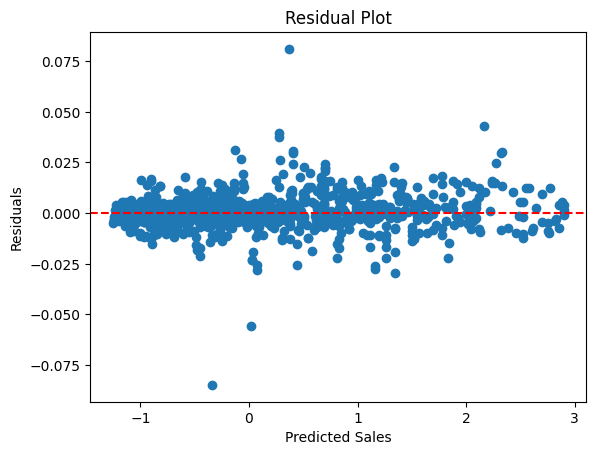

In [32]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
import joblib

# Save the model after training
joblib.dump(best_rf, 'random_forest_model.pkl')

# Load the model for predictions
model = joblib.load('random_forest_model.pkl')

# Prediction on new data
predictions = model.predict(new_data)


NameError: name 'best_rf' is not defined

In [35]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get input data from the request
    prediction = model.predict([data['features']])
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'

In [36]:
import joblib

# Assuming 'grid_search' is your GridSearchCV or RandomizedSearchCV object
best_rf = grid_search.best_estimator_

# Save the best Random Forest model
joblib.dump(best_rf, 'random_forest_model.pkl')

# Load the model for predictions
model = joblib.load('random_forest_model.pkl')

# Example prediction
predictions = model.predict(new_data)


NameError: name 'new_data' is not defined

In [37]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming 'rf_model' is your trained RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)  # Train your model

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model for predictions
model = joblib.load('random_forest_model.pkl')

# Example prediction
predictions = model.predict(new_data)


NameError: name 'new_data' is not defined

In [38]:
import pandas as pd

# Example of new data you want to predict on
new_data = pd.DataFrame({
    'unit_price': [50, 100],
    'quantity_sold': [200, 150],
    'revenue_per_product': [1000, 1500],
    'sales_per_unit': [10, 15]
})

# If you did any preprocessing (e.g., scaling), apply it to new_data
# new_data_scaled = scaler.transform(new_data)  # If you used a scaler like StandardScaler

# Make predictions using the loaded model
predictions = model.predict(new_data)

print(predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- forecasted_demand


In [39]:
import joblib
from flask import Flask, request, jsonify

# Initialize the Flask application
app = Flask(__name__)

# Load the trained Random Forest model
model = joblib.load('random_forest_model.pkl')


In [40]:
@app.route('/predict', methods=['POST'])
def predict():
    # Extract input data from the request
    data = request.get_json()  # Assumes data is sent in JSON format

    # Get the features from the input data
    features = data['features']

    # Use the model to make a prediction
    prediction = model.predict([features])

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})


In [41]:
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
